In [1]:
# !pip install shap
# !pip install lime

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('preprocessed_data.csv')
X = data.drop('SeriousDlqin2yrs', axis=1).to_numpy()
y = data['SeriousDlqin2yrs'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = data.drop('SeriousDlqin2yrs', axis=1).columns

In [4]:
class SklearnWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
    def fit(self, X, y):
        self.model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
        return self
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)
    def predict_proba(self, X):
        probs = self.model.predict(X)
        return np.hstack([1 - probs, probs])

In [5]:
tf_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model = SklearnWrapper(tf_model)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      9336
           1       0.35      0.37      0.36       664

    accuracy                           0.91     10000
   macro avg       0.65      0.66      0.66     10000
weighted avg       0.92      0.91      0.91     10000

ROC AUC Score: 0.7573129923292141
Confusion Matrix:
 [[8883  453]
 [ 418  246]]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 800x600 with 0 Axes>

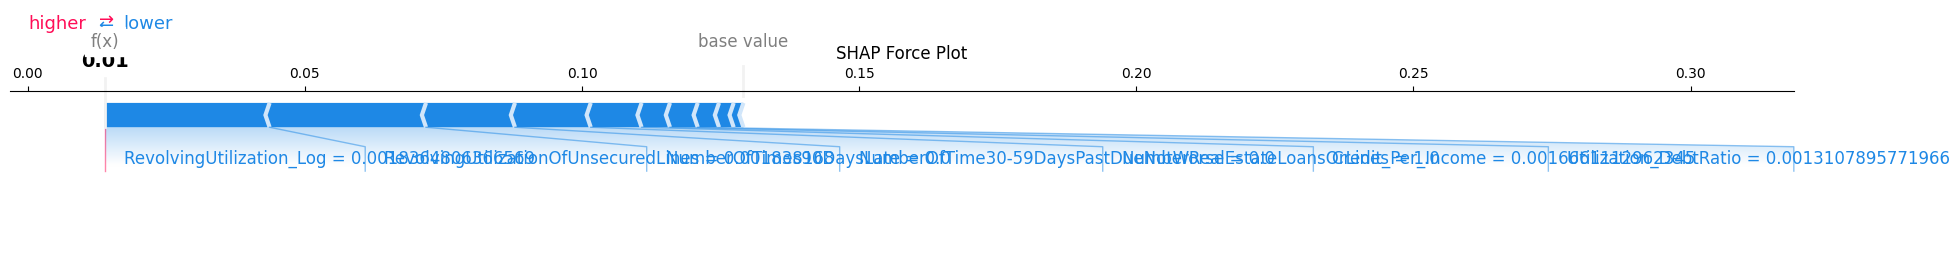

In [6]:
# Explainability Techniques
# 1. SHAP
plt.figure(figsize=(8, 6))
def predict_fn_shap(data):
    return model.predict_proba(data)[:, 1]
explainer = shap.KernelExplainer(predict_fn_shap, shap.sample(X_train, 100))  # Use 100 background samples
shap_values = explainer.shap_values(X_test[:1], nsamples=50)  # Compute for one instance
shap.force_plot(explainer.expected_value, shap_values[0], X_test[:1], feature_names=feature_names, matplotlib=True, show=False)
plt.title('SHAP Force Plot', fontsize=12)
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━

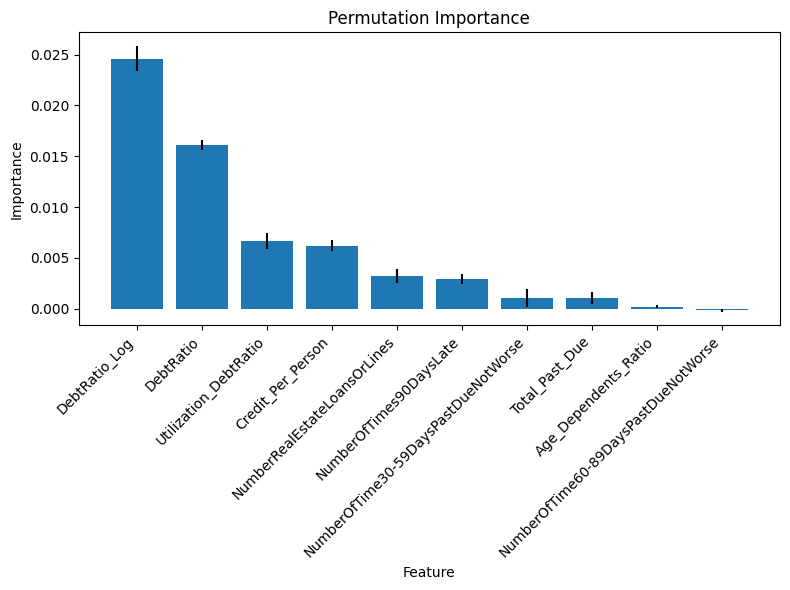

In [9]:
# 3. Permutation Importance
plt.figure(figsize=(8, 6))
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42, scoring='accuracy')
perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
})
perm_df = perm_df.sort_values('Importance', ascending=False)
perm_df = perm_df.head(10)
plt.bar(range(len(perm_df)), perm_df['Importance'], yerr=perm_df['Std'])
plt.xticks(range(len(perm_df)), perm_df['Feature'], rotation=45, ha='right', fontsize=10)
plt.title('Permutation Importance', fontsize=12)
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Importance', fontsize=10)
plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


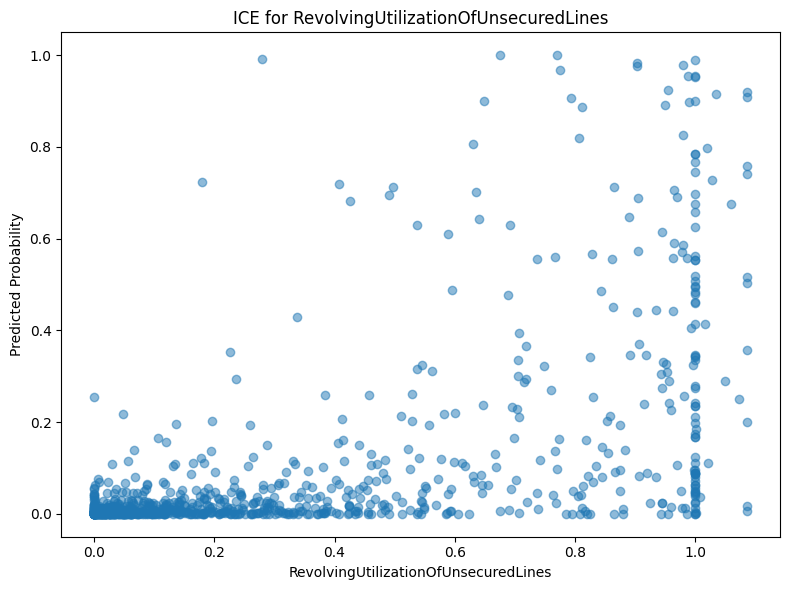

In [10]:
# 4. Individual Conditional Expectation (ICE)
plt.figure(figsize=(8, 6))
feature_to_plot = 'RevolvingUtilizationOfUnsecuredLines'
sample_indices = np.random.choice(X_test.shape[0], 1000, replace=False)
X_test_sample = X_test[sample_indices]
ice_values = model.predict_proba(X_test_sample)[:, 1]
plt.scatter(X_test_sample[:, feature_names.get_loc(feature_to_plot)], ice_values, alpha=0.5)
plt.title(f'ICE for {feature_to_plot}', fontsize=12)
plt.xlabel(feature_to_plot, fontsize=10)
plt.ylabel('Predicted Probability', fontsize=10)
plt.tight_layout()
plt.show()